In [1]:
!pip install pydub scipy numpy

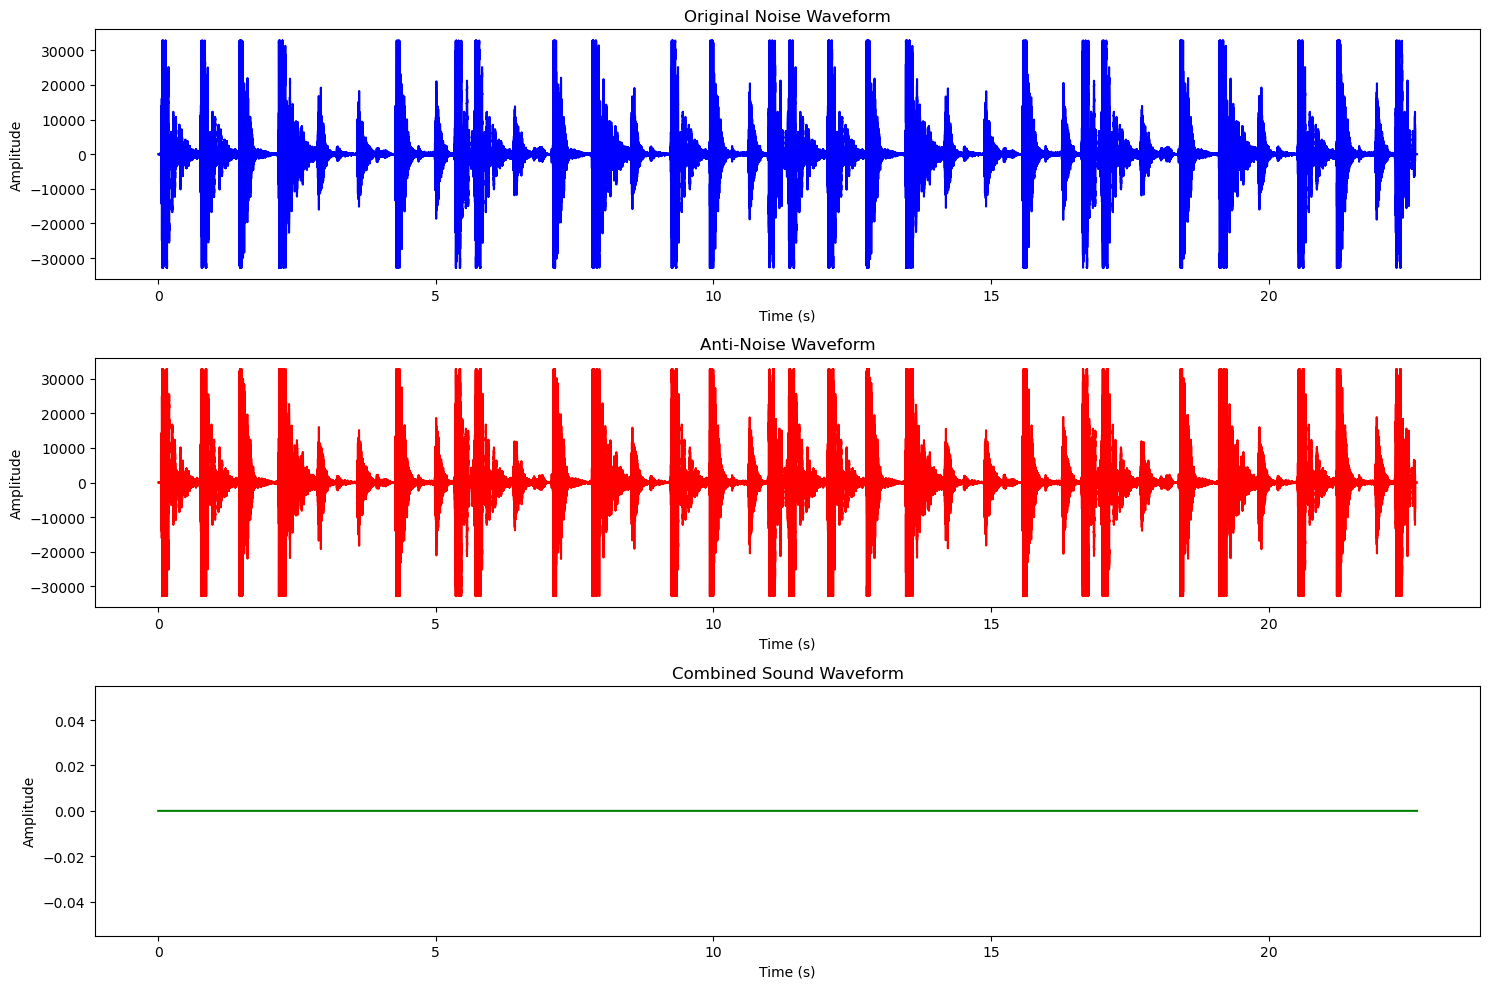

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from pydub import AudioSegment
from pydub.playback import play

audio = AudioSegment.from_file("samples/drums.mp3")

# Convert to numpy array
samples = np.array(audio.get_array_of_samples())
sample_rate = audio.frame_rate

# Invert the waveform to create anti-sound
anti_samples = -samples

# Combine the original sound and anti-noise
combined_samples = samples + anti_samples

anti_audio = AudioSegment(
    anti_samples.tobytes(),
    frame_rate=sample_rate,
    sample_width=audio.sample_width,
    channels=audio.channels
)

combined_audio = AudioSegment(
    combined_samples.tobytes(),
    frame_rate=sample_rate,
    sample_width=audio.sample_width,
    channels=audio.channels
)

# Save as MP3 files
anti_audio.export("samples/anti_drums.mp3", format="mp3")
combined_audio.export("samples/combined_sound.mp3", format="mp3")

# Plot the waveforms
time = np.arange(len(samples)) / sample_rate

plt.figure(figsize=(15, 10))

# Original noise plot
plt.subplot(3, 1, 1)
plt.plot(time, samples, color='b')
plt.title("Original Noise Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Anti-noise plot
plt.subplot(3, 1, 2)
plt.plot(time, anti_samples, color='r')
plt.title("Anti-Noise Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Combined sound plot
plt.subplot(3, 1, 3)
plt.plot(time, combined_samples, color='g')
plt.title("Combined Sound Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Mix and Play Both the Original and Anti-Noise Audio Sources


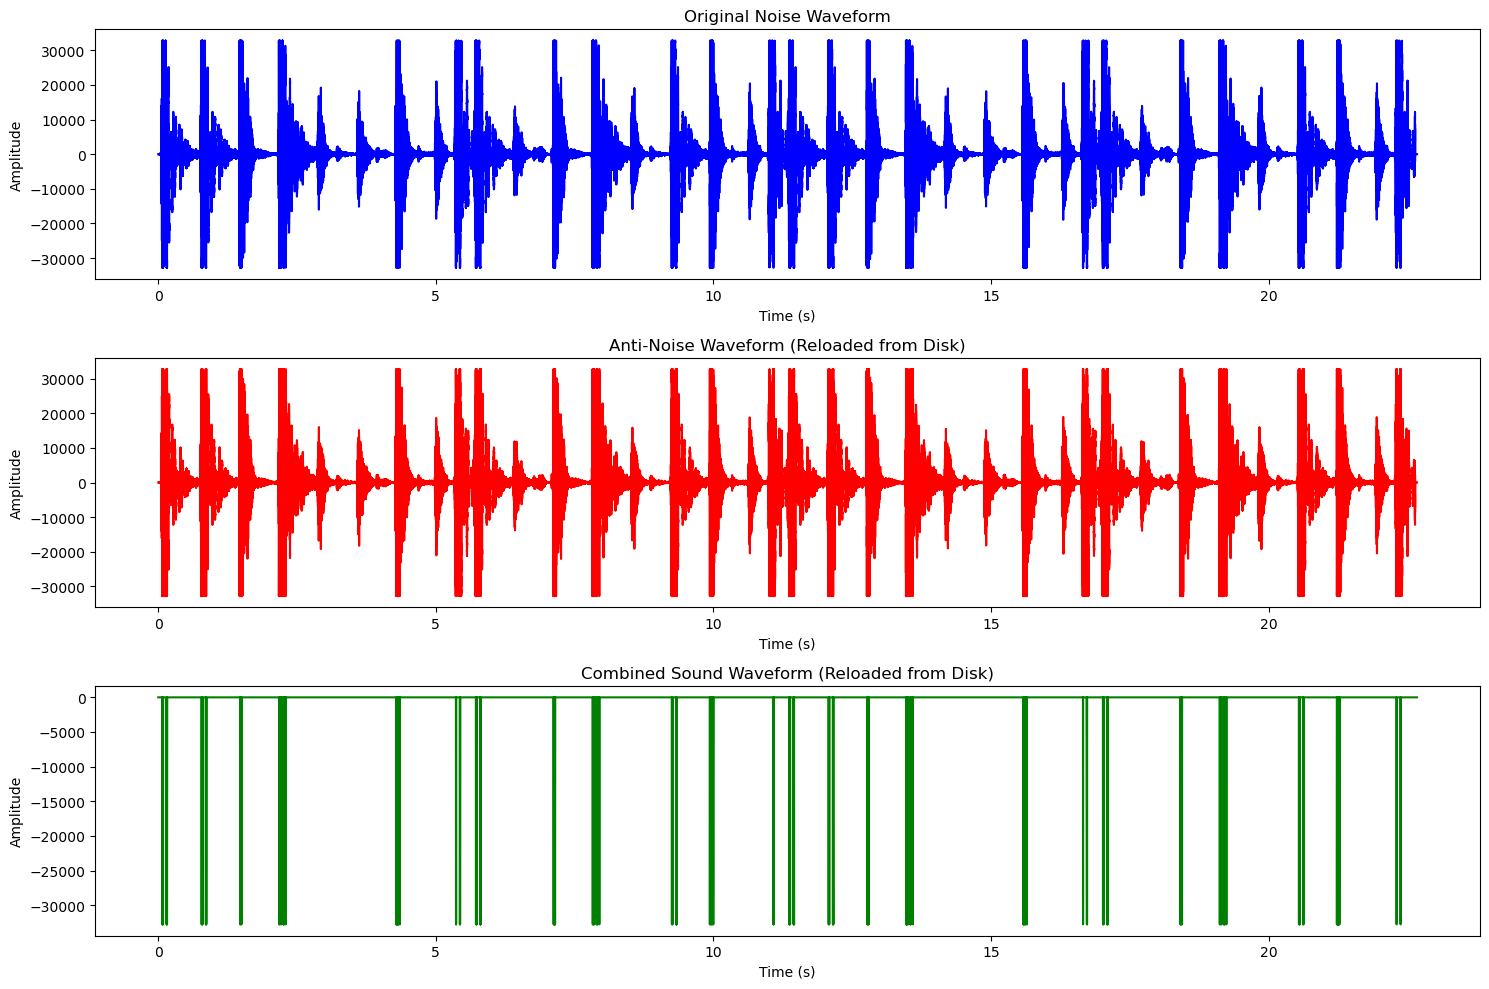

Playing mixed audio (original + anti-noise)...


Input #0, wav, from '/var/folders/2x/gqcyn6n97t34dbd3mv3dv5h40000gp/T/tmpty3ewucv.wav':
  Duration: 00:00:11.34, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from pydub import AudioSegment
from pydub.playback import play

audio = AudioSegment.from_file("samples/drums.mp3")

samples = np.array(audio.get_array_of_samples())
sample_rate = audio.frame_rate

# Invert the waveform to create anti-sound
anti_samples = -samples

anti_audio = AudioSegment(
    anti_samples.tobytes(),
    frame_rate=sample_rate,
    sample_width=audio.sample_width,
    channels=audio.channels
)

# Overlay the original audio and anti-noise
mixed_audio = audio.overlay(anti_audio)

# Save the anti-noise and mixed audio to disk
anti_audio.export("samples/anti_noise.wav", format="wav")
mixed_audio.export("samples/mixed_audio.wav", format="wav")

# Reload the saved audio files
anti_audio_reloaded = AudioSegment.from_file("samples/anti_noise.wav")
mixed_audio_reloaded = AudioSegment.from_file("samples/mixed_audio.wav")

# Convert reloaded audio to numpy arrays
anti_samples_reloaded = np.array(anti_audio_reloaded.get_array_of_samples())
mixed_samples_reloaded = np.array(mixed_audio_reloaded.get_array_of_samples())

# Ensure all waveforms have the same length
min_length = min(len(samples), len(anti_samples_reloaded), len(mixed_samples_reloaded))
samples = samples[:min_length]
anti_samples_reloaded = anti_samples_reloaded[:min_length]
mixed_samples_reloaded = mixed_samples_reloaded[:min_length]

time = np.arange(min_length) / sample_rate

plt.figure(figsize=(15, 10))

# Original noise plot
plt.subplot(3, 1, 1)
plt.plot(time, samples, color='b')
plt.title("Original Noise Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Anti-noise plot
plt.subplot(3, 1, 2)
plt.plot(time, anti_samples_reloaded, color='r')
plt.title("Anti-Noise Waveform (Reloaded from Disk)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Combined sound plot
plt.subplot(3, 1, 3)
plt.plot(time, mixed_samples_reloaded, color='g')
plt.title("Combined Sound Waveform (Reloaded from Disk)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Play the mixed audio
print("Playing mixed audio (original + anti-noise)...")
play(mixed_audio)

## Visualising a Small Sample of Both the Original and Anti- sound on the Same Graph

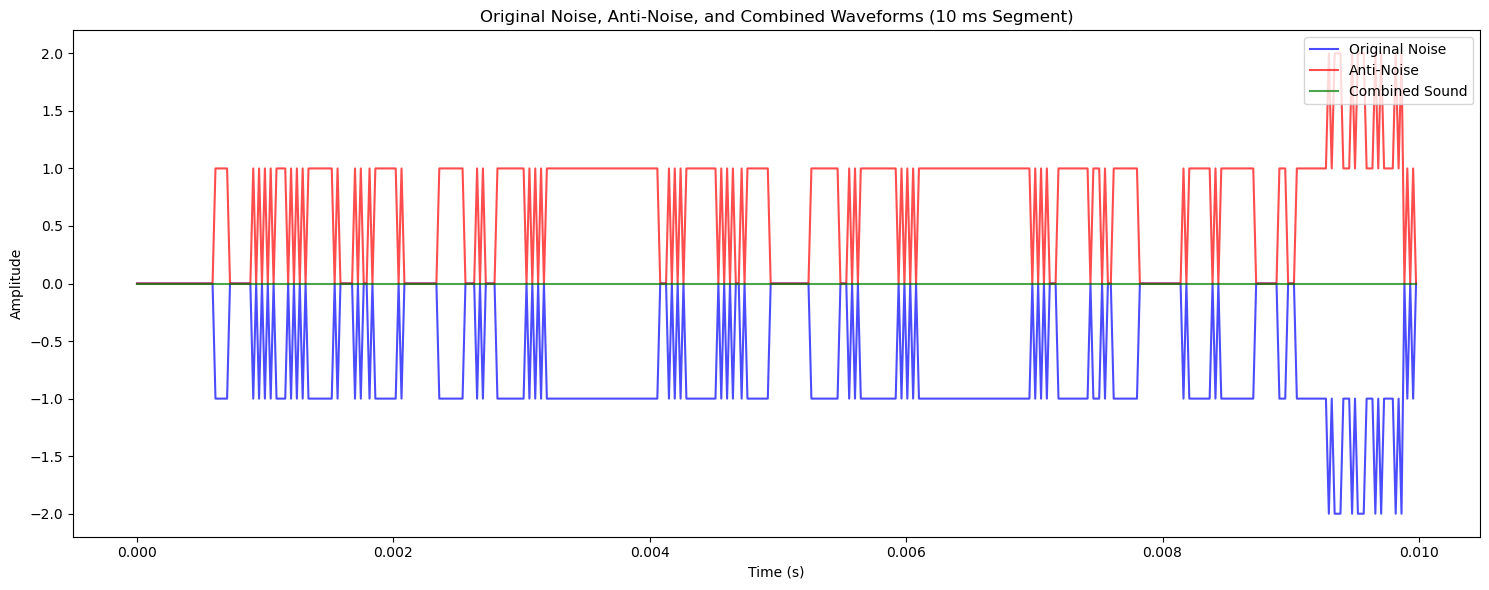

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from pydub import AudioSegment

audio = AudioSegment.from_file("samples/drums.mp3")

samples = np.array(audio.get_array_of_samples())
sample_rate = audio.frame_rate

anti_samples = -samples

# Combine the original sound and anti-noise
combined_samples = samples + anti_samples

# Select a smaller segment of the audio (e.g., 10 milliseconds)
start_time = 0  # Start time in seconds
end_time = 0.01  # End time in seconds (10 milliseconds)
start_index = int(start_time * sample_rate)
end_index = int(end_time * sample_rate)

# Extract the smaller segment
time_segment = np.arange(start_index, end_index) / sample_rate
samples_segment = samples[start_index:end_index]
anti_samples_segment = anti_samples[start_index:end_index]
combined_samples_segment = combined_samples[start_index:end_index]

plt.figure(figsize=(15, 6))

# Plot original waveform (blue)
plt.plot(time_segment, samples_segment, color='b', alpha=0.7, label="Original Noise")

# Plot anti-noise waveform (red)
plt.plot(time_segment, anti_samples_segment, color='r', alpha=0.7, label="Anti-Noise")

# Plot combined waveform (green)
plt.plot(time_segment, combined_samples_segment, color='g', alpha=0.7, label="Combined Sound")

plt.title("Original Noise, Anti-Noise, and Combined Waveforms (10 ms Segment)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()